# Seal detection demo
This demo shows the detection of seals and polar bears in aerial infrared images taken by the National Oceanic and Atmospheric Administration (NOAA).

In [1]:
import requests
from io import BytesIO
import random
random.seed(0)
import glob
import PIL.Image
import numpy as np
import os
from IPython.core.display import Image, display

api_address = 'http://sealsapivm.southcentralus.cloudapp.azure.com:8088/'
test_image_folder = '/data/seals_blob1_test/'

In [2]:
requests.get(api_address).text

'Health check OK'

### IR image preview

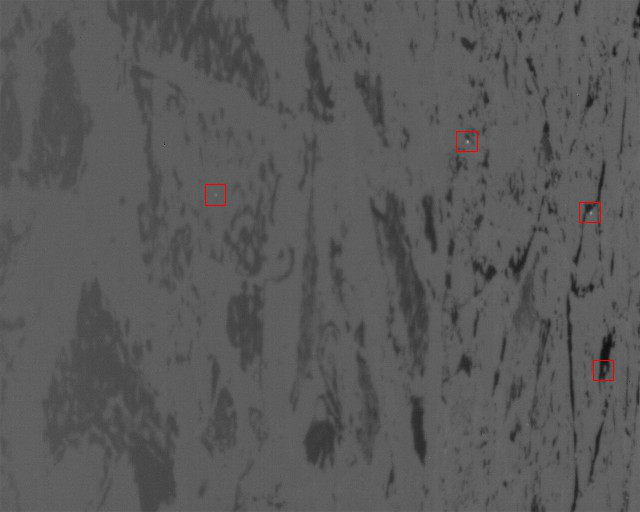

In [3]:
image_path = random.choice(glob.glob(os.path.join(test_image_folder, '*_THERM-16BIT-N.PNG')))
upload_image = PIL.Image.fromarray((np.array(PIL.Image.open(image_path))/256).astype(np.uint8))
upload_image

### Detection in normalized IR images

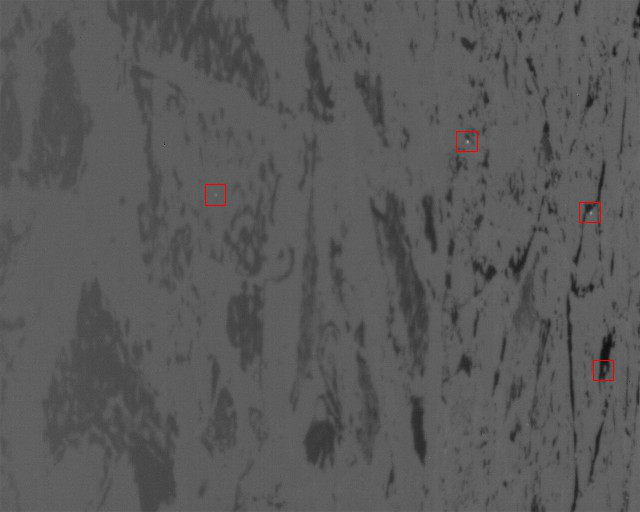

In [3]:
upload_bytes = BytesIO()
upload_image.save(upload_bytes, 'PNG')
upload_bytes.seek(0)
result_image = PIL.Image.open(BytesIO(requests.post(api_address + 'v1/detection_api/detect', 
                        data=upload_bytes,
                        headers={'Content-Type':'image/png'}).content))
result_image

### Color image preview

In [ ]:
image_basename = os.path.split(image_path[:image_path.index('_THERM-16BIT-N.PNG')])[1]
color_image_path = os.path.join(test_image_folder, image_basename + '_COLOR-8-BIT.JPG')
color_image = PIL.Image.open(color_image_path)
color_image.thumbnail((700,700), PIL.Image.ANTIALIAS)
color_image

### Full-size color image
It takes a while after the cell computation has completed until the color image is loaded.

Click with the middle mouse button on the image to scroll around in any direction.

In [ ]:
# Displaying the color image takes a while
display(Image(color_image_path, unconfined=True))

### Notes
The current example code does not support multi-part post requests, hence you need to pass the images using the data parameter of requests.post instead of the files parameter as shown above. Below would be the multi part variant, which is not supported yet

In [ ]:
# Multiplart variant
# Currently not supported
upload_bytes.seek(0)
print(requests.post(api_address + 'v1/detection_api/detect', 
              files=[('image_bytes', ('input.png', upload_bytes, 'image/png'))]).text)